# Exploratory analysis: Yields data -- messy notebook

Original notebook where all the equations are to make a gist. 

This notebook is for exploring different yield datasets and visualizing relationships between yield, rainfall, and water stress.

It's definitely overkill but I use three different methods for calculating the linear regression and confidence errors:

- Manual calculation in `calc_lin_regression`; [source](https://medium.com/@mjfstanford/simple-linear-regression-in-python-905b759ef0e6)
- seaborn's lmplot() in `calc_lin_regression`; [source](https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/)
- Another set of calculations with error bars as shown in [this gist](https://github.com/KirstieJane/STATISTICS/blob/master/CIs_LinearRegression.py).

Probably should write my own gist comparing these.

Last updated: 29 April 2020

### Imports

In [199]:
# import packages and set working directory
import numpy as np
import matplotlib.pyplot as plt
import os
from math import exp
import pandas as pd
import seaborn as sns
import proplot as plot
import sys
from scipy.stats import t
from scipy.optimize import curve_fit

# We need to add the module path to our system path so 
# that our notebook can find our local objects and code:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import objects
from farm import Climate
from farm import Soil
from farm import Crop
from farm import CropModel
from farm.functions import *

# set background color
plot.rc['figure.facecolor'] = 'white'
plot.rc.axesfacecolor = 'white'

### Functions

In [185]:
def plot_lin_regression(x_var = None, y_var = None, x_str = None, y_str = None, data = None, 
                        x_lab = 'X label here', y_lab = 'Y label here', title = 'Title here', positive = True):
    """ Computes linear regression between independent and dependent variable. 

    Usage: plot_lin_regression(x_var, y_var, x_lab, y_lab, title)
    """
    # Define variables
    X, y = x_var, y_var
    
    # Linear regression
    denominator = X.dot(X) - X.mean() * X.sum()
    m = ( X.dot(y) - y.mean() * X.sum() ) / denominator
    b = (y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator

    y_pred = m*X + b

    # Here I have two figures to make sure they're similar.. 
    # regular plot and seaborn plot with automatic conf. intervals
    fig, ax = plt.subplots(figsize=(5,4))
    plt.figure(figsize=(5,4))

    ax.scatter(X,y,color=(0.2, 0.4, 0.6, 0.6))
    g = sns.lmplot(x_str, y_str, data, ci=95, height=4, scatter_kws={'color':'black','alpha':0.5}) # line_kws={'color': 'black'}
    ax.plot(X,y_pred,'ok',markersize=3, linewidth=2.5) #alpha=0.6,
    
    # Calculate residuals
    res = y - y_pred
    tot = y - y.mean()

    R_squared = 1 - res.dot(res) / tot.dot(tot)
    print(R_squared)
    print('m',m)
    print('b',b)
    
    if positive == True:
        textstr = '\n'.join((
            r'$ y = %.2f$x' % (m, )+'+$  %2.0f$' % (b, ),
            r'$r^2=%.2f$' % (R_squared, ))) 
    else:
        textstr = '\n'.join((
        r'$ y = %.2f$x' % (m, )+'$  %2.0f$' % (b, ),
        r'$r^2=%.2f$' % (R_squared, )))

    props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

    # place a text box in upper left in axes coords
    g.fig.text(0.25, 2.27, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    

    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title, fontweight="bold")
    #plt.savefig('output/figures/YieldvsDTM.png', dpi=500)

In [ ]:
# version 2:
def plot_lin_regression(x_var = None, y_var = None, x_str = None, y_str = None, data = None, 
                        x_lab = 'X label here', y_lab = 'Y label here', title = 'Title here', positive = True):
    """ Computes linear regression between independent and dependent variable. 

    Usage: plot_lin_regression(x_var, y_var, x_lab, y_lab, title)
    """
    # Define variables
    X, y = x_var, y_var
    
    # Linear regression
    denominator = X.dot(X) - X.mean() * X.sum()
    m = ( X.dot(y) - y.mean() * X.sum() ) / denominator
    b = (y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator

    y_pred = m*X + b

    # Here I have two figures to make sure they're similar.. 
    # regular plot and seaborn plot with automatic conf. intervals
    #fig, ax = plt.subplots(figsize=(5,4))
    plt.figure(figsize=(5,4))

    #ax.scatter(X,y,color=(0.2, 0.4, 0.6, 0.6))
    g = sns.lmplot(x_str, y_str, data, ci=95, height=4, scatter_kws={'color':'black','alpha':0.6}) # ,, line_kws={'color': 'black'}
    #ax.plot(X,y_pred,'ok',markersize=3, linewidth=2.5) #alpha=0.6,
    
    # Calculate residuals
    res = y - y_pred
    tot = y - y.mean()

    R_squared = 1 - res.dot(res) / tot.dot(tot)
    print(R_squared)
    print('m',m)
    print('b',b)
    
    if positive == True:
        textstr = '\n'.join((
            r'$ y = %.2f$x' % (m, )+'+$  %2.0f$' % (b, ),
            r'$r^2=%.2f$' % (R_squared, ))) 
    else:
        textstr = '\n'.join((
        r'$ y = %.2f$x' % (m, )+'$  %2.0f$' % (b, ),
        r'$r^2=%.2f$' % (R_squared, )))

    props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

    # place a text box in upper left in axes coords
    g.fig.text(0.25, 2.27, textstr, fontsize=10, #transform=ax.transAxes, 
            verticalalignment='top', bbox=props)
    
    #ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
    #        verticalalignment='top', bbox=props)
    

    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.title(title, fontweight="bold")
    #plt.savefig('output/figures/YieldvsDTM.png', dpi=500)
    
plot_lin_regression(df.TotalRF, df.AvgStress, 'TotalRF','AvgStress',df, 'Seasonal rainfall (mm)', 'Static stress', 'Relationship between rainfall and stress')

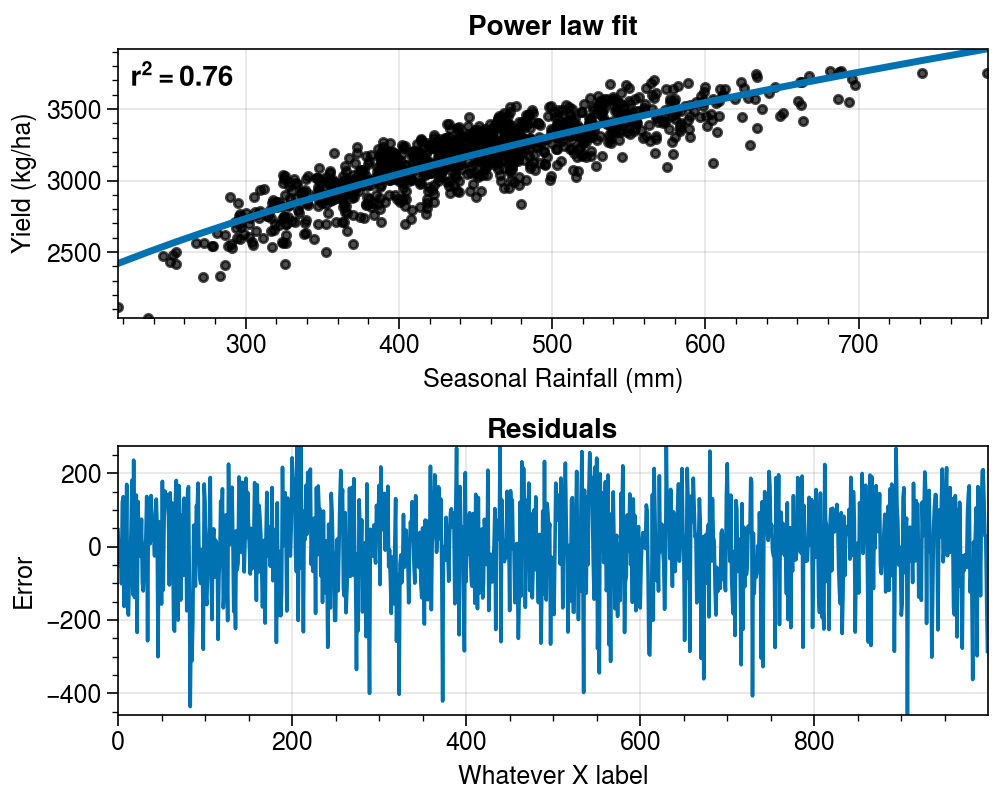

In [259]:
def power_law_fit(xdat,ydat, x_lab, y_lab, title):
    x,y = xdat, ydat
    power_law = lambda x, a, b: a * (x**b)
    f, axs = plot.subplots(ncols=1, nrows=2, share=0,
                           figsize=(5,4)) #axwidth can't be used if figsize also used 
    
    # Find best fit.
    popt, pcov = curve_fit(power_law, x, y)
    
    # Top plot
    # Plot data and best fit curve.
    #axs.scatter(x,y,color='black',alpha=0.7)
    axs[0].plot(x, y,'ok', alpha=0.7)
    axs[0].plot(np.sort(x), power_law(np.sort(x), *popt),'-',markersize=3,  linewidth=2.5) # like this color color=(0.2, 0.4, 0.6, 0.6)
    
    
    
    #r2
    residuals = y - power_law(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    r_squared
    
    #r2
    from sklearn.metrics import r2_score
    r2_score(y, power_law(x, *popt), multioutput='variance_weighted')
    
    textstr = r'$r^2=%.2f$' % (r_squared, )

    props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

    #f.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
    #            verticalalignment='top', bbox=props)
    
    axs[0].format(suptitle=title, title = textstr,titleweight='bold', titleloc='ul',
                 ylabel=y_lab, xlabel=x_lab)
    
    # Bottom plot
    axs[1].plot(residuals) #linewidth=.9
    axs[1].format(title='Residuals', titleweight='bold',xlabel='Whatever X label',
                 ylabel='Error') #, titleloc='ul


    # plot residuals
    
    #ss_res / ss_tot
    #print(ss_res, ss_tot)
    #print(popt[0],popt[1])
    
power_law_fit(df.TotalRF, df.Yield,'Seasonal Rainfall (mm)', 'Yield (kg/ha)', 'Power law fit')

In [ ]:
def power_law_fit(xdat,ydat, x_lab, y_lab, title):
    x,y = xdat, ydat
    power_law = lambda x, a, b: a * (x**b)
    f, axs = plot.subplots(ncols=1, nrows=2, share=0, #order='C',
                           figsize=(5,4)) #axwidth can't be used if figsize also used 
    
    # Find best fit.
    popt, pcov = curve_fit(power_law, x, y)
    
    # Top plot
    # Plot data and best fit curve.
    #axs.scatter(x,y,color='black',alpha=0.7)
    axs[0].plot(x, y,'ok', alpha=0.6)
    axs[0].plot(np.sort(x), power_law(np.sort(x), *popt),'-',markersize=3,  linewidth=2.5) # like this color color=(0.2, 0.4, 0.6, 0.6)
    
    #r2
    residuals = y - power_law(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    r_squared
    
    #r2
    from sklearn.metrics import r2_score
    r2_score(y, power_law(x, *popt), multioutput='variance_weighted')
    
    textstr = r'$r^2=%.2f$' % (r_squared, )

    props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

    #f.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
    #            verticalalignment='top', bbox=props)
    
    axs[0].format(suptitle=title, title = textstr,titleweight='bold', titleloc='ul',
                 ylabel=y_lab, xlabel=x_lab)
    
    # Bottom plot
    axs[1].plot(residuals) #linewidth=.9
    axs[1].format(title='Residuals', titleweight='bold',xlabel='Whatever X label',
                 ylabel='Error') #, titleloc='ul
    axs[0].set_xlim(min(x)-3, max(x)+10)  
    #axs[0].set_ylim(min(y)-500,max(y)+500)
    #ss_res / ss_tot
    #print(ss_res, ss_tot)
    #print(popt[0],popt[1])
#power_law_fit(x,y,'Seasonal Rainfall (mm)', 'Yield (kg/ha)', 'Power law fit')

In [186]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results, yhat, ybar

Version 2 of this; not strictly necessary, but fancy. From [this gist](https://github.com/KirstieJane/STATISTICS/blob/master/CIs_LinearRegression.py).

In [187]:
def lin_fit(x,y):
    '''
    Predicts the values for a best fit between numpy arrays x and y
    Parameters
    ----------
    x: 1D numpy array
    y: 1D numpy array (same length as x)
    Returns
    -------
    p:     parameters for linear fit of x to y
    y_err: 1D array of difference between y and fit values
               (same length as x)
    '''

    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    fit = p(x)

    y_err = y - fit

    return p, y_err

def conf_calc(x, y_err, c_limit=0.975, test_n=50):
    '''
    Calculates confidence interval of regression between x and y
    Parameters
    ----------
    x:       1D numpy array
    y_err:   1D numpy array of residuals (y - fit)
    c_limit: (optional) float number representing the area to the left
             of the critical value in the t-statistic table
             eg: for a 2 tailed 95% confidence interval (the default)
                    c_limit = 0.975
    test_n:  (optional) integer representing numer of equally-spaced
             x-points to predict in the range min(x) to max(x)
    Returns
    -------
    p_x:   1D array, length "test_n", with values spread evenly between
           min(x) and max(x)
    confs: 1D numpy array of predicted y values for x inputs
    '''
    # Define the variables you need
    # to calculate the confidence interval
    mean_x = np.mean(x)			# mean of x
    n = len(x)				# number of samples in origional fit
    tstat = t.ppf(c_limit, n-1)         # appropriate t value
    s_err = np.sum(np.power(y_err,2))	# sum of the squares of the residuals

    # create series of new test x-values to predict for
    p_x = np.linspace(np.min(x),np.max(x),test_n)

    confs = tstat * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((p_x-mean_x),2)/((np.sum(np.power(x,2)))-n*(np.power(mean_x,2))))))

    return p_x, confs

def ylines_calc(p_x, confs, fit):
    '''
    Calculates the three lines that will be plotted
    Parameters
    ----------
    p_x:   1D array with values spread evenly between min(x) and max(x)
    confs: 1D array with confidence values for each value of p_x
    fit:   Predicted x -> y function (typically derived from np.poly1d)
    Returns
    -------
    p_y:    1D array with values corresponding to fit line (for p_x values)
    upper:  1D array, values corresponding to upper confidence limit line
    lower:  1D array, values corresponding to lower confidence limit line
    '''
    # now predict y based on test x-values
    p_y = fit(p_x)

    # get lower and upper confidence limits based on predicted y and confidence intervals
    lower = p_y - abs(confs)
    upper = p_y + abs(confs)

    return p_y, lower, upper

def plot_linreg_CIs(x, y, p_x, p_y, lower, upper):

    # set-up the plot
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Linear regression and confidence limits')

    # plot sample data
    plt.plot(x, y, 'o', label='Sample observations')

    # plot line of best fit
    plt.plot(p_x, p_y, 'r-', label='Regression line')

    # plot confidence limits
    plt.plot(p_x, lower, 'r--', label='Lower confidence limit (95%)')
    plt.plot(p_x, upper, 'r--', label='Upper confidence limit (95%)')

    # show the plot
    plt.show()


def confidence_bounds(x, y, c_limit=0.975, test_n=50):
    '''
    Calculates the predicted (trend) line, and lower & upper confidene bounds
    from original x,y measurements
    Parameters
    ----------
    x: 1D numpy array
    y: 1D numpy array (same length as x)
    c_limit: (optional) float number representing the area to the left
             of the critical value in the t-statistic table
             eg: for a 2 tailed 95% confidence interval (the default)
                    c_limit = 0.975
    test_n:  (optional) integer representing numer of equally-spaced
             x-points to predict in the range min(x) to max(x)
    Returns
    -------
    p_x:    1D array with values spread evenly between min(x) and max(x)
            (length test_n)
    p_y:    1D array with values corresponding to fit line (for p_x values)
            (length test_n)
    upper:  1D array, values corresponding to upper confidence limit line
    lower:  1D array, values corresponding to lower confidence limit line
    '''

    # Fit x to y
    p, y_err = lin_fit(x ,y)

    # Calculate confidence intervals
    p_x, confs = conf_calc(x, y_err, c_limit=c_limit, test_n=test_n)

    # Calculate the lines for plotting:
    # The fit line, and lower and upper confidence bounds
    p_y, lower, upper = ylines_calc(p_x, confs, p)

    return p_x, p_y, lower, upper

In [188]:
# calc yield from stress

def calc_yield(stress=None, max_yield = 4000):
    yield_kg_ha = -max_yield*stress + max_yield
    
    if stress > 1:
        raise ValueError("static stress, {stress} is larger than 1".format(
                stress=stress))
    if stress < 0:
        raise ValueError("static stress, {stress} is less than 0".format(
                stress=stress))
    
    return yield_kg_ha

In [189]:
def total_rf_corr(n_sim = 1000, station = 'OL JOGI FARM', texture = 'loam', lgp=180, pd_sim=100): 
    """ Run simulations for a specific climate, soil, and crop.

    Usage: total_rf_corr(n_sim, pd_ic, station, texture, lgp, pd_sim)
           
    Default values:
        n_sim = 500 # Number of Simulations to Remove Initial Conditions [integer]
        pd_ic = 1 # Planting Date for Initial Conditions [Julian day]
        station = 'OL JOGI FARM' # Climatology [string]
        texture = 'loam' # Soil Type [string]
        lgp = 180 # Length of Growing Period [Days]
        pd_sim 100 # Planting Date for Simulation [Julian day]

    """
    # Part 1. Set conditions for IC runs
    n_sim = n_sim # change back to 1000 later
    planting_date = pd_sim 

    # Part 2. Initialize model with a climate, soil and crop
    climate = Climate(station=station)
    soil = Soil(texture=texture)
    crop = Crop(soil=soil, lgp=lgp)
    soil.set_nZr(crop)

    model = CropModel(crop=crop, climate=climate, soil=soil)
    model.run()
    o = model.output()

    # Part 3. Get the mean, SD soil moisture and run the simulations to remove IC
    s0_mean, s0_std = average_soil_moisture(model, n_sims=n_sim, doy=planting_date)
    models = [CropModel(crop=crop, climate=Climate(), soil=soil) for i in np.arange(n_sim)]
    
    # Part 4. Run the actual simulations
    output = [model.run(s0=s0_mean, do_output=True, planting_date=planting_date) for model in models]

    # Part 5. Subset the growing period and get avg stress, total rf
    start = 21 
    end = start + lgp
    avg_stress = [df[start:end]['stress'].mean() for df in output]
    total_rf = [df[start:end]['R'].sum() for df in output]

    return output, avg_stress, total_rf


Using numpy's polyfit function

- answer came from here: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
- http://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html
- https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html
- Feel like an exponential should work: https://stackoverflow.com/questions/24633664/confidence-interval-for-exponential-curve-fit

In [ ]:
def polyfit(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results, yhat, ybar


### Analysis

#### 1. Visualize yield vs. DTM relationship using Hybrid yields dataset from Ridge to Reef

0.8821342568671494
m 38.209721942492855
b -2572.222327532072


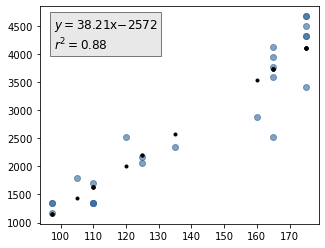

<Figure size 360x288 with 0 Axes>

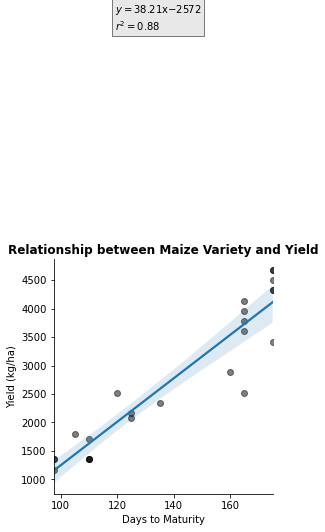

In [190]:
hybrid_data = pd.read_csv('../data/hybrid_yields.csv')

plot_lin_regression(hybrid_data.days_to_maturity, hybrid_data.yield_kg_ha, 'days_to_maturity', 'yield_kg_ha', hybrid_data,'Days to Maturity', 'Yield (kg/ha)', 
                    'Relationship between Maize Variety and Yield', positive=False)

Version two of this because why not

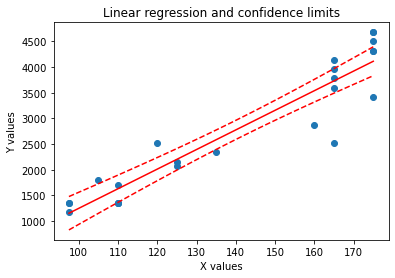

In [191]:
if __name__ == "__main__":
    # Define example data
    x, y = hybrid_data.days_to_maturity, hybrid_data.yield_kg_ha

    # Fit x to y
    p, y_err = lin_fit(x, y)

    # Calculate confidence intervals
    p_x, confs = conf_calc(x, y_err, 0.975)

    # Calculate the lines for plotting:
    # The fit line, and lower and upper confidence bounds
    p_y, lower, upper = ylines_calc(p_x, confs, p)

    # Plot these lines
    plot_linreg_CIs(x, y, p_x, p_y, lower, upper)

#### 2. Linear regression for seasonal rainfall and stress correlation 

In [192]:
output, avg_stress, total_rf = total_rf_corr()

data_tuples = list(zip(total_rf, avg_stress))
df = pd.DataFrame(data_tuples, columns=['TotalRF','AvgStress']) # TODO: Check that this does what I think it does

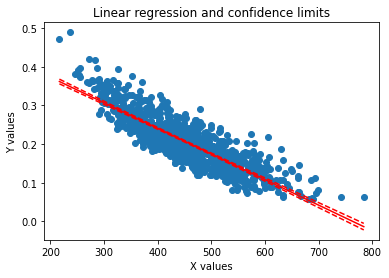

In [193]:
if __name__ == "__main__":
    # Define example data
    x, y = df.TotalRF, df.AvgStress

    # Fit x to y
    p, y_err = lin_fit(x, y)

    # Calculate confidence intervals
    p_x, confs = conf_calc(x, y_err, 0.975)

    # Calculate the lines for plotting:
    # The fit line, and lower and upper confidence bounds
    p_y, lower, upper = ylines_calc(p_x, confs, p)

    # Plot these lines
    plot_linreg_CIs(x, y, p_x, p_y, lower, upper)

0.7397181817526631
m -0.0006620041524996704
b 0.505565407447768


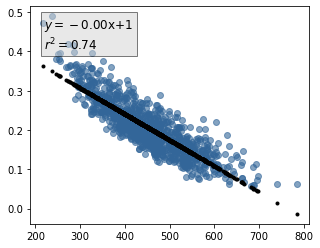

<Figure size 360x288 with 0 Axes>

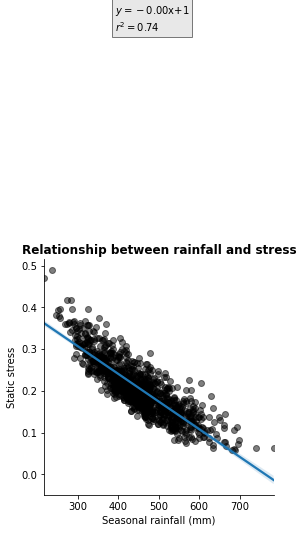

In [194]:
plot_lin_regression(df.TotalRF, df.AvgStress, 'TotalRF','AvgStress',df, 'Seasonal rainfall (mm)', 'Static stress', 'Relationship between rainfall and stress')

#### 3. Convert stress values to yield and do linear regression

0.7397181817526632
m 2.648016609998664
b 1977.73837020893


3766.5060356653557

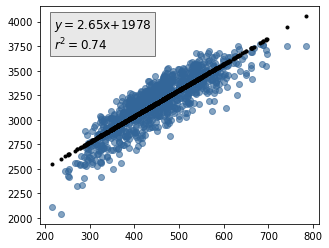

<Figure size 360x288 with 0 Axes>

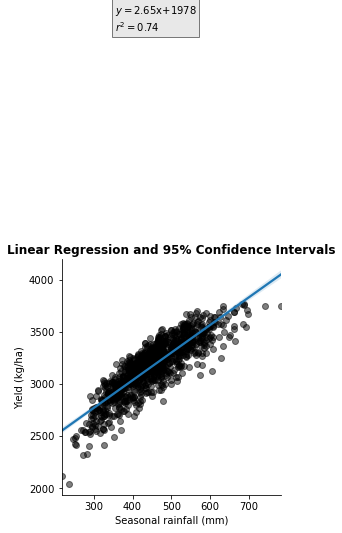

In [195]:
# make a column for yield values from stress
df['Yield'] = pd.Series([calc_yield(i) for i in avg_stress])

plot_lin_regression(df.TotalRF, df.Yield, 'TotalRF', 'Yield',df, 'Seasonal rainfall (mm)', 'Yield (kg/ha)', 'Linear Regression and 95% Confidence Intervals')

max(pd.Series([calc_yield(i) for i in avg_stress]))

#### 4. Fitted curve for rainfall and yield

Using numpy's polyfit function

- answer came from here: https://stackoverflow.com/questions/893657/how-do-i-calculate-r-squared-using-python-and-numpy
- http://scipy-lectures.org/intro/numpy/auto_examples/plot_polyfit.html
- https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html
- Feel like an exponential should work: https://stackoverflow.com/questions/24633664/confidence-interval-for-exponential-curve-fit

TODOs:
0. Think about Kelly's comment: `"Can you normalize yield by max yield? Then we might think about a curve (which will end up being y = ax^c + b, where c is pretty close, but slightly less than 1."`
1. Why the funky r2 value for the power law fit
2. Can I get confidence bars around the lines
3. Add parameters to legend like bottom of this doc: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
4. Further clean up the notebook

When is R2 negative? The fit should be better than a straight line.

https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

9.580223261707773e-06

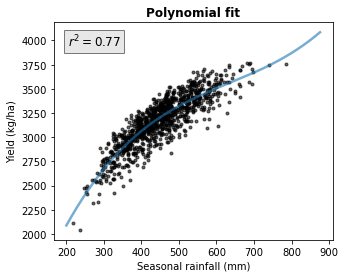

In [196]:
x,y = df.TotalRF, df.Yield

fig, ax = plt.subplots(figsize=(5,4))
    
p = np.poly1d(np.polyfit(x, y, 3))

t = np.linspace(200, 876, 1000)
ax.plot(x, y, 'ok', t, p(t), '-', markersize=3, alpha=0.6, linewidth=2.5)

results, yhat, ybar = polyfit(x,y,3)

R_squared = results['determination']

textstr = r'$r^2=%.2f$' % (R_squared, )

props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

fig.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)
    
x_lab, y_lab, title = 'Seasonal rainfall (mm)', 'Yield (kg/ha)', 'Polynomial fit'

plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title(title, fontweight="bold")

results['polynomial'][0]

16857439.397799157 70382274.72134602
321.25300827055753 0.3754041662060571


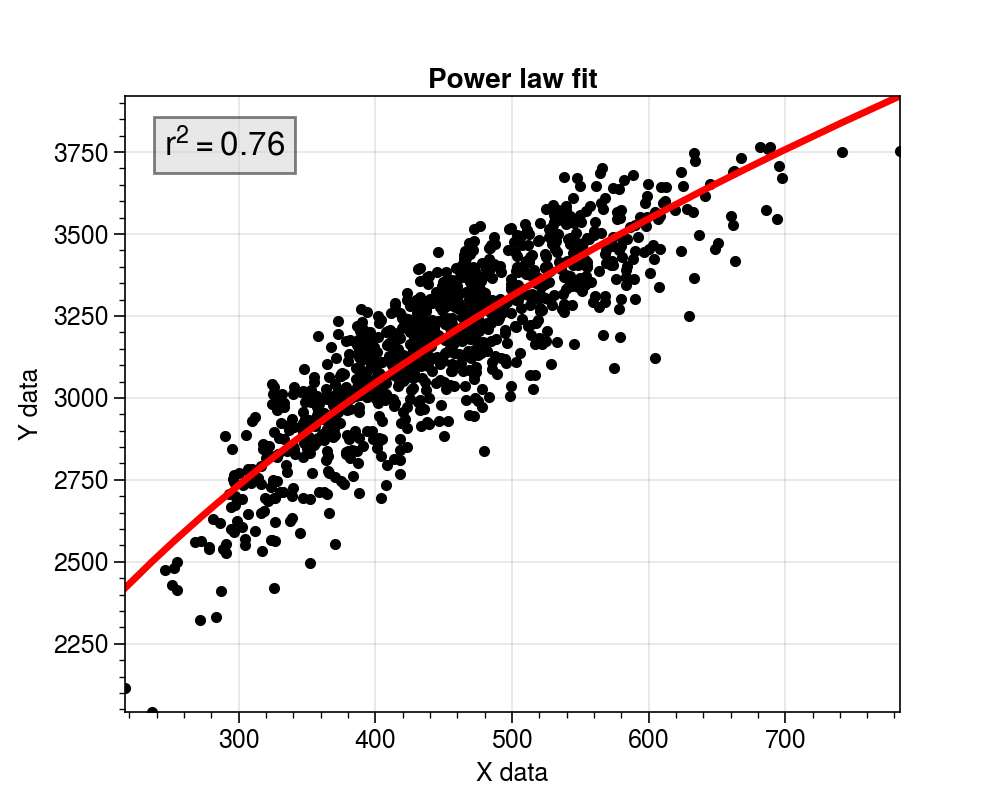

16857439.397799157 70382274.72134602
321.25300827055753 0.3754041662060571


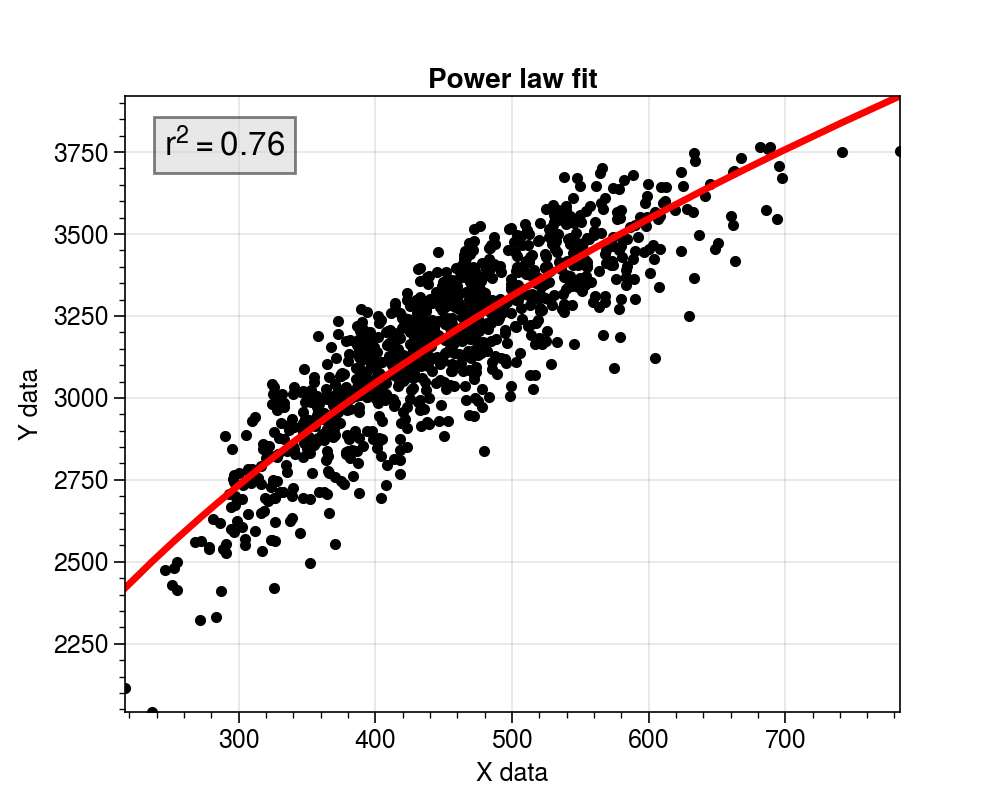

In [200]:
# this should be helpful for errors: https://stackoverflow.com/questions/24633664/confidence-interval-for-exponential-curve-fit
# fianlly this got it for me: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509

x,y = df.TotalRF, df.Yield

#def power_law(x, a, b):
#    return a*np.power(x, b)

power_law = lambda x, a, b: a * (x**b)

fig, ax = plt.subplots(figsize=(5,4))

# Find best fit.
popt, pcov = curve_fit(power_law, x, y)
#print popt

# Plot data and best fit curve.
plt.plot(x, y,'ok') #alpha=0.6
#x = np.linspace(0, 400, len(x)) #changed from 200, 876, 200
plt.plot(np.sort(x), power_law(np.sort(x), *popt),'r-',markersize=3,  linewidth=2.5) #just -

# get r2: https://stackoverflow.com/questions/19189362/getting-the-r-squared-value-using-curve-fit
residuals = y - power_law(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

from sklearn.metrics import r2_score

r2_score(y, power_law(x, *popt), multioutput='variance_weighted')

#x_lab, y_lab, title = 'Seasonal rainfall (mm)', 'Yield (kg/ha)', 'Power law fit'
x_lab, y_lab, title = 'X data', 'Y data', 'Power law fit'

plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title(title, fontweight="bold")

textstr = r'$r^2=%.2f$' % (r_squared, )

props = dict(boxstyle='square', facecolor='lightgray', alpha=0.5)

fig.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=props)

ss_res / ss_tot
print(ss_res, ss_tot)
print(popt[0],popt[1])


In [157]:



#df = pd.DataFrame(x,y).rename(columns={"Yield": "Xdata", 0: "Ydata"})

#print("df = pd.DataFrame( %s )" % (str(df.to_dict())))
#df

#plt.plot(df, 'ok')

df
#data
x,y = df.TotalRF, df.Yield
data_tuples = list(zip(x,y))

data_tuples
data = pd.DataFrame(data_tuples, columns=['Xdata','Ydata']).set_index('Xdata')
data
#print("data = pd.DataFrame( %s )" % (str(data.to_dict())))

#data = pd.DataFrame( {'Ydata': {33.77668981525018: 2369.3537487348394, 124.60567061544208: 3643.239322868638, 127.285514589589: 3320.0978082499128, 105.69682012055456: 1927.8088047482252, 138.61307895024538: 3448.8936440966313, 105.76149778060632: 3347.0058169639183, 223.00910244809592: 3590.3578829550497, 119.40446947593799: 2527.7372462930825, 68.47475406261421: 2872.759315890833, 179.526601505406: 3412.1252524708325, 35.138667250966826: 2137.3159615919676, 122.89027494079119: 3465.7273847480974, 126.07168290666988: 3338.8456302803293, 121.70967238625153: 3180.040719682358, 50.19732063000886: 2140.4329217649483, 127.02512441045278: 3178.6241147090586, 149.42679481393023: 3606.8616590065926, 146.7767338171453: 3069.96869703239, 103.49636004657151: 2884.8469701102385, 184.226898302443: 3431.558454891458, 110.19235203510956: 2708.248506284317, 131.54765888239868: 3092.6518591995364, 109.73779290021082: 3661.4510899073175, 149.94222753756588: 3370.428639764632, 125.07793027908943: 3292.2079189626297, 106.69483599972773: 3687.6007945409283, 155.8602333969539: 3207.800399654923, 50.07448204885887: 2107.712879393004, 130.965990788059: 3600.2681404377154, 160.20687773720533: 3814.225839299121, 89.96142426896367: 3058.1460654072716, 155.97306465678506: 3499.6585473072296, 185.24996371377495: 3646.8090012685743, 84.01631350959411: 2532.784921843282, 168.67144783136752: 3394.6356985058437, 85.85183150972952: 2543.455577446215, 148.6872293917145: 3636.897439984532, 54.724983999894846: 2723.3915544442452, 52.034974752503075: 1944.0071940007424, 177.70427305192072: 3860.807278384248, 96.72345398377955: 3332.663895233287, 78.49199387740822: 3162.3259937215744, 181.6112043235845: 3408.735881888708, 105.89234384759466: 3268.4461476274932, 46.875945064213454: 1872.1869763342597, 145.72069111214876: 3622.890753318794, 53.97174431225298: 2799.0922185221552, 142.3761526928369: 3538.6369313124123, 154.39111504769016: 2327.1427424263666, 174.55824636135364: 3867.2724998840217}} )
#data.index

new_dat = pd.DataFrame()
new_dat['x'] = df.TotalRF
new_dat['y'] = df.Yield

In [159]:
new_dat = new_dat
print("new_dat = pd.DataFrame( %s )" % (str(new_dat.to_dict())))

new_dat

new_dat = pd.DataFrame( {'x': {0: 133.39072904912717, 1: 138.24394099399626, 2: 123.68098616912548, 3: 145.53622634264102, 4: 115.66589965763, 5: 102.3954554988245, 6: 188.36808402142134, 7: 159.973167750876, 8: 109.27288573117258, 9: 228.48970913145482, 10: 59.72149772767079, 11: 107.86289489093632, 12: 139.54636990829943, 13: 69.16804084300782, 14: 128.51492415467243, 15: 123.89886969748194, 16: 96.69524458890069, 17: 179.4218007796204, 18: 81.94248858920511, 19: 116.57431987139303, 20: 86.72287597716091, 21: 104.26504167186982, 22: 96.21176975617014, 23: 113.05563002252855, 24: 95.13881793216328, 25: 90.24566440833108, 26: 120.21979837370618, 27: 148.02989788213065, 28: 131.5536333505709, 29: 43.98432257846345, 30: 151.20808505875556, 31: 106.90408749635041, 32: 208.84439653547977, 33: 141.93620845530992, 34: 66.06470015823503, 35: 144.26451450341665, 36: 268.44231416009114, 37: 104.21592558477657, 38: 87.4647314243362, 39: 21.62506288172477, 40: 211.8288449343543, 41: 137.1783782430448, 42: 152.68656578316114, 43: 71.40444647539057, 44: 138.26429570303063, 45: 195.8195134445166, 46: 65.0580543537033, 47: 91.53609270183331, 48: 133.93031838426649, 49: 130.18323679275105}, 'y': {0: 3385.9107941013963, 1: 3767.4773129933837, 2: 3393.972804533385, 3: 3207.540799419189, 4: 3503.971988612639, 5: 2699.582157811891, 6: 3472.2197615815303, 7: 3734.8682981154525, 8: 3015.1595391710443, 9: 3833.7005103694264, 10: 2180.8813084622725, 11: 3057.1175212715566, 12: 3322.2694622283707, 13: 2625.095843511092, 14: 3428.9305902296073, 15: 3665.3597140080483, 16: 3348.2359174389712, 17: 3203.650823344419, 18: 2314.649577797234, 19: 3445.142411753858, 20: 2854.0698989716257, 21: 3224.426663700497, 22: 2975.4529990214733, 23: 2830.8849349346683, 24: 2757.178895276296, 25: 2804.842233145504, 26: 2580.295378480375, 27: 3451.028240314123, 28: 3559.855598644374, 29: 1682.632983470442, 30: 3573.6640120241777, 31: 2612.5922620115434, 32: 3047.6869797329296, 33: 3500.1611748529945, 34: 2976.7358839883286, 35: 3270.15016432246, 36: 3702.39276797799, 37: 3174.024034000559, 38: 3116.0557991571313, 39: 2277.6763663475185, 40: 2907.349510347204, 41: 2959.5225286559644, 42: 3523.744356032963, 43: 2793.4503330781213, 44: 3688.929929188237, 45: 3654.619681532315, 46: 2077.6749192493166, 47: 2692.8596392079253, 48: 3365.5547117446195, 49: 3357.554384166426}} )

new_dat = pd.DataFrame( {'x': {0: 133.39072904912717, 1: 138.24394099399626, 2: 123.68098616912548, 3: 145.53622634264102, 4: 115.66589965763, 5: 102.3954554988245, 6: 188.36808402142134, 7: 159.973167750876, 8: 109.27288573117258, 9: 228.48970913145482, 10: 59.72149772767079, 11: 107.86289489093632, 12: 139.54636990829943, 13: 69.16804084300782, 14: 128.51492415467243, 15: 123.89886969748194, 16: 96.69524458890069, 17: 179.4218007796204, 18: 81.94248858920511, 19: 116.57431987139303, 20: 86.72287597716091, 21: 104.26504167186982, 22: 96.21176975617014, 23: 113.05563002252855, 24: 95.13881793216328, 25: 90.24566440833108, 26: 120.21979837370618, 27: 148.02989788213065, 28: 131.5536333505709, 29: 43.98432257846345, 30: 151.20808505875556, 31: 106.90408749635041, 32: 208.84439653547977, 33: 141.93620845530992, 34: 66.06470015823503, 35: 144.26451450341665, 36: 268.44231416009114, 37: 104.21592558477657, 38: 87.4647314243362, 39: 21.62506288172477, 40: 211.8288449343543, 41: 137.178378243

In [160]:
new_dat

,x,y
0,133.390729,3385.910794
1,138.243941,3767.477313
2,123.680986,3393.972805
3,145.536226,3207.540799
4,115.665900,3503.971989
5,102.395455,2699.582158
6,188.368084,3472.219762
7,159.973168,3734.868298
8,109.272886,3015.159539
9,228.489709,3833.700510


r2 from method 1 is: 0.5459230145983525
r2 from methood 2 is: 0.5459230145983525


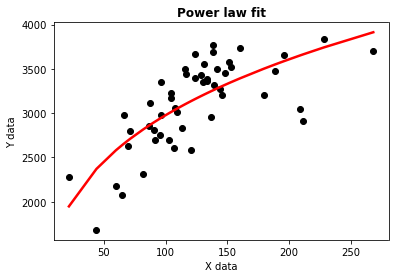

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
import pandas as pd
from scipy.optimize import curve_fit

new_dat = pd.DataFrame( {'x': {0: 133.39072904912717, 1: 138.24394099399626, 2: 123.68098616912548, 3: 145.53622634264102, 4: 115.66589965763, 5: 102.3954554988245, 6: 188.36808402142134, 7: 159.973167750876, 8: 109.27288573117258, 9: 228.48970913145482, 10: 59.72149772767079, 11: 107.86289489093632, 12: 139.54636990829943, 13: 69.16804084300782, 14: 128.51492415467243, 15: 123.89886969748194, 16: 96.69524458890069, 17: 179.4218007796204, 18: 81.94248858920511, 19: 116.57431987139303, 20: 86.72287597716091, 21: 104.26504167186982, 22: 96.21176975617014, 23: 113.05563002252855, 24: 95.13881793216328, 25: 90.24566440833108, 26: 120.21979837370618, 27: 148.02989788213065, 28: 131.5536333505709, 29: 43.98432257846345, 30: 151.20808505875556, 31: 106.90408749635041, 32: 208.84439653547977, 33: 141.93620845530992, 34: 66.06470015823503, 35: 144.26451450341665, 36: 268.44231416009114, 37: 104.21592558477657, 38: 87.4647314243362, 39: 21.62506288172477, 40: 211.8288449343543, 41: 137.1783782430448, 42: 152.68656578316114, 43: 71.40444647539057, 44: 138.26429570303063, 45: 195.8195134445166, 46: 65.0580543537033, 47: 91.53609270183331, 48: 133.93031838426649, 49: 130.18323679275105}, 'y': {0: 3385.9107941013963, 1: 3767.4773129933837, 2: 3393.972804533385, 3: 3207.540799419189, 4: 3503.971988612639, 5: 2699.582157811891, 6: 3472.2197615815303, 7: 3734.8682981154525, 8: 3015.1595391710443, 9: 3833.7005103694264, 10: 2180.8813084622725, 11: 3057.1175212715566, 12: 3322.2694622283707, 13: 2625.095843511092, 14: 3428.9305902296073, 15: 3665.3597140080483, 16: 3348.2359174389712, 17: 3203.650823344419, 18: 2314.649577797234, 19: 3445.142411753858, 20: 2854.0698989716257, 21: 3224.426663700497, 22: 2975.4529990214733, 23: 2830.8849349346683, 24: 2757.178895276296, 25: 2804.842233145504, 26: 2580.295378480375, 27: 3451.028240314123, 28: 3559.855598644374, 29: 1682.632983470442, 30: 3573.6640120241777, 31: 2612.5922620115434, 32: 3047.6869797329296, 33: 3500.1611748529945, 34: 2976.7358839883286, 35: 3270.15016432246, 36: 3702.39276797799, 37: 3174.024034000559, 38: 3116.0557991571313, 39: 2277.6763663475185, 40: 2907.349510347204, 41: 2959.5225286559644, 42: 3523.744356032963, 43: 2793.4503330781213, 44: 3688.929929188237, 45: 3654.619681532315, 46: 2077.6749192493166, 47: 2692.8596392079253, 48: 3365.5547117446195, 49: 3357.554384166426}} )
x,y = new_dat.x, new_dat.y

def power_law(x, a, b):
    return a*np.power(x, b)
    #return (ax+b)*np.power(1/3)

# find best fit
popt, pcov = curve_fit(power_law, x, y)

# plot data and best fit curve.
plt.plot(x, y,'ok')
#x = np.linspace(5, 300, len(x)) #prev had linspace where it shouldn't be
plt.plot(np.sort(x), power_law(np.sort(x), *popt),'r-',markersize=3,  linewidth=2.5)

# get r2 via method 1
residuals = y - power_law(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
r_squared = 1 - (ss_res / ss_tot)

# get r2 via method 2
from sklearn.metrics import r2_score
r_squared_2 = r2_score(y, power_law(x, *popt), multioutput='variance_weighted')

# plot labels
x_lab, y_lab, title = 'X data', 'Y data', 'Power law fit'
plt.xlabel(x_lab)
plt.ylabel(y_lab)
plt.title(title, fontweight="bold")

#ss_res / ss_tot
#print(ss_res, ss_tot)
#print(popt[0],popt[1])

# print both r2 methods
print('r2 from method 1 is:',r_squared)
print('r2 from methood 2 is:',r_squared_2)

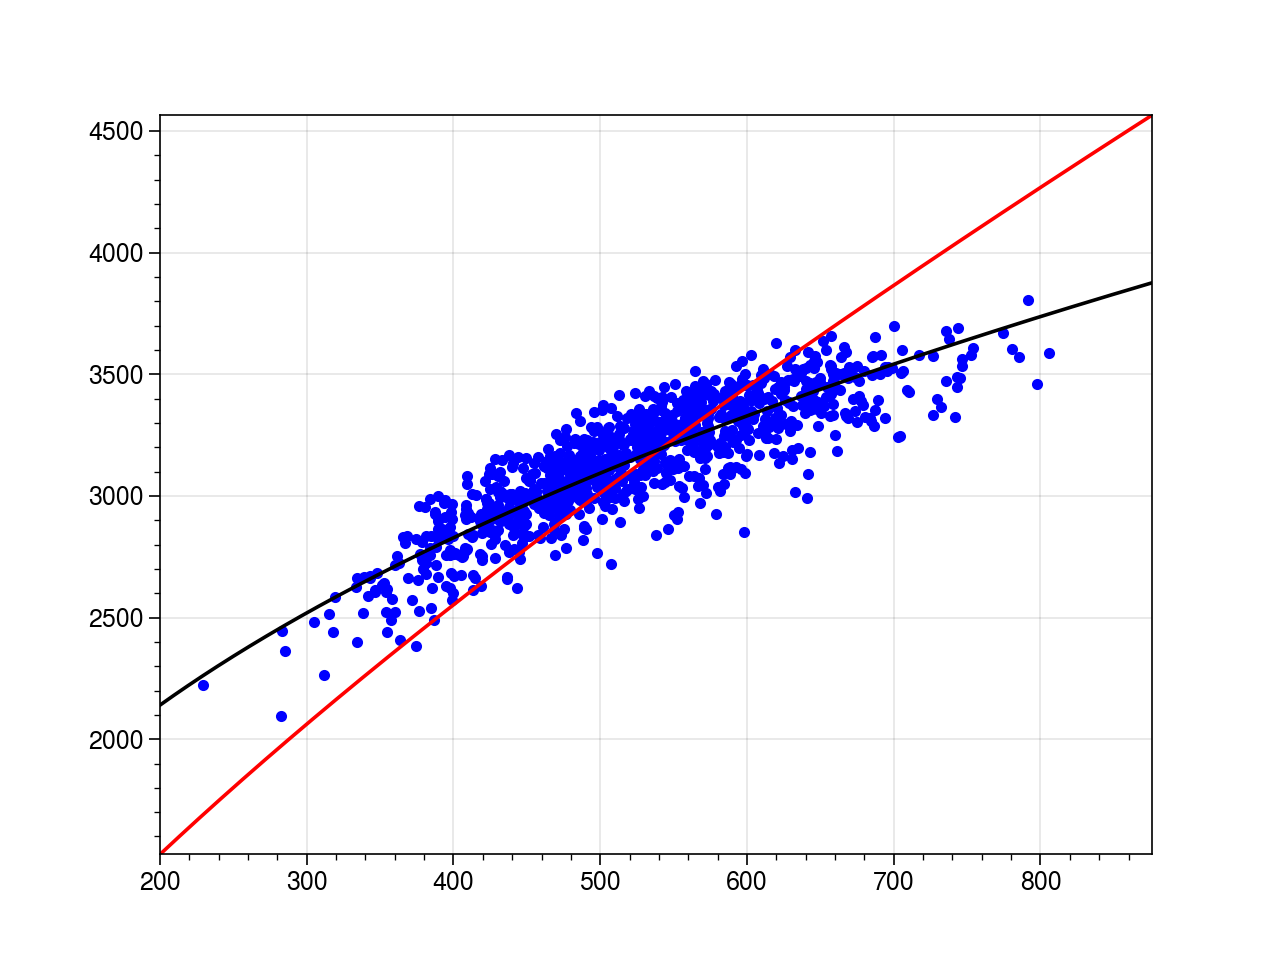

0      3330.008338
1      3570.021601
2      2986.757153
3      3082.431927
4      3100.583161
          ...     
995    2863.551385
996    2894.992273
997    3534.333532
998    3491.530124
999    3061.986232
Name: Yield, Length: 1000, dtype: float64

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


xData,yData = df.TotalRF, df.Yield

# get logarithmic data
lx = np.log(xData)
ly = np.log(yData)

def f(x, N, a):
    return N * x ** (a)

def f_log(x, lN, a):
    return a * x + lN

# optimize using the appropriate bounds
popt, pcov = curve_fit(f, xData, yData, bounds=(0, [30., 20.]))
popt_log, pcov_log = curve_fit(f_log, lx, ly, bounds=([0, -10], [30., 20.]))

xnew = np.linspace(200, 800., 5000)
xnew = np.linspace(200, 876, 1000)

# plot the data
plt.plot(xData, yData, 'bo')
plt.plot(xnew, f(xnew, *popt), 'r')
plt.plot(xnew, f(xnew, np.exp(popt_log[0]), popt_log[1]), 'k')
plt.show()

r2_score(df.Yield, f(xnew, *popt), multioutput='variance_weighted')

xData
yData

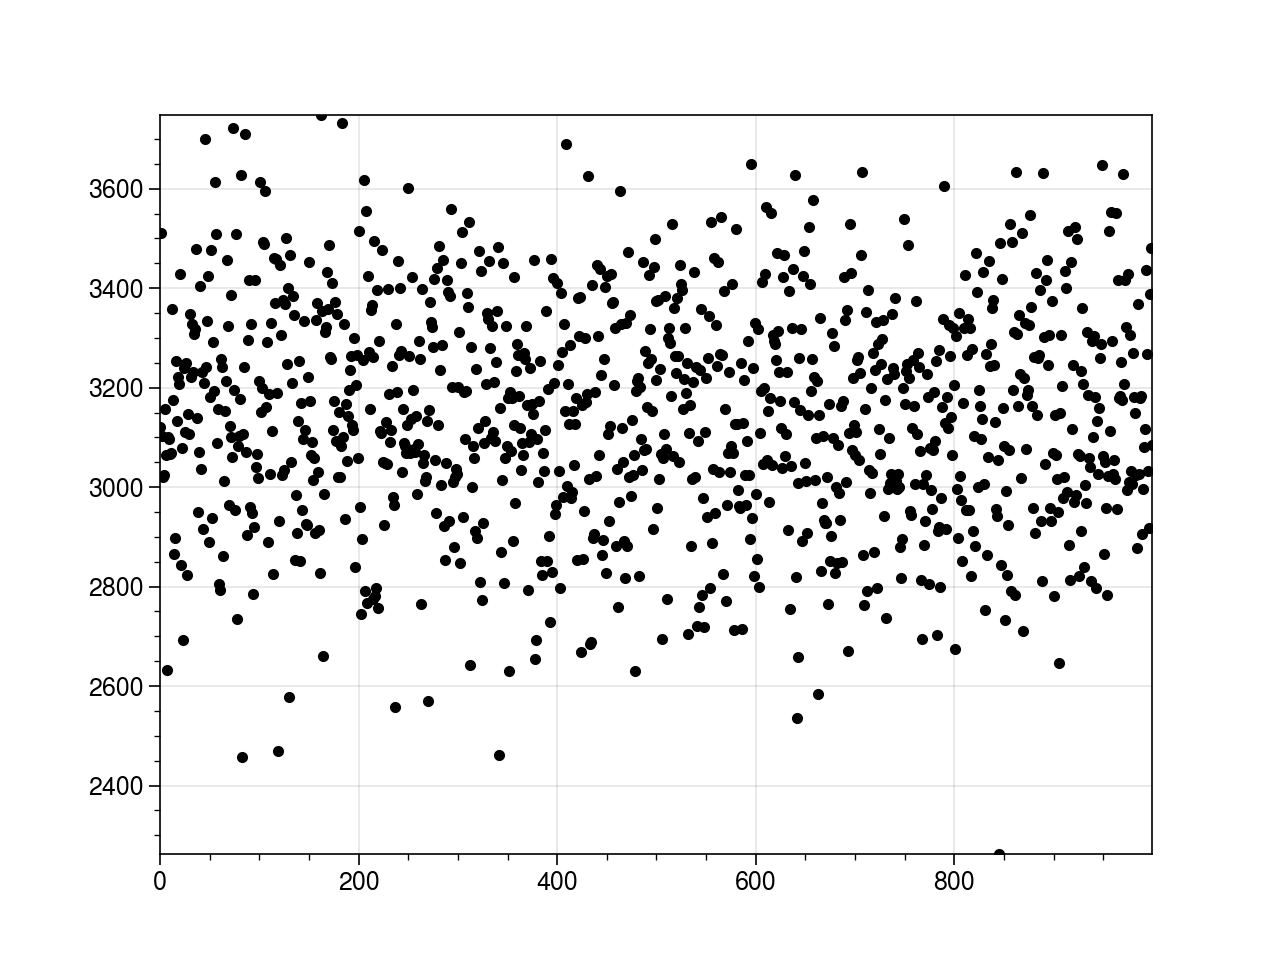

In [36]:
# Plot the logged data -- doesn't really make sense with real world data though
from scipy import optimize

logx = np.log10(df.TotalRF)
logy = np.log10(df.Yield)

# define our (line) fitting function
fitfunc = lambda p, x: p[0] + p[1] * x
errfunc = lambda p, x, y: (y - fitfunc(p, x))

pinit = [1.0, -1.0]
out = optimize.leastsq(errfunc, pinit,
                       args=(logx, logy), full_output=1)

pfinal = out[0]
covar = out[1]
#print(pfinal)
#print(covar)

index = pfinal[1]
amp = 10.0**pfinal[0]

indexErr = np.sqrt( covar[1][1] )
ampErr = np.sqrt( covar[0][0] ) * amp

#plt.loglog(df.TotalRF, powerlaw(df.TotalRF, amp, index))
#plt.errorbar(df.TotalRF, df.Yield,fmt='k.')  # Data
#plt.xlabel('X (log scale)')
#plt.ylabel('Y (log scale)')
#plt.xlim(1.0, 11)

plt.plot(powerlaw(df.TotalRF, amp, index), 'ok')

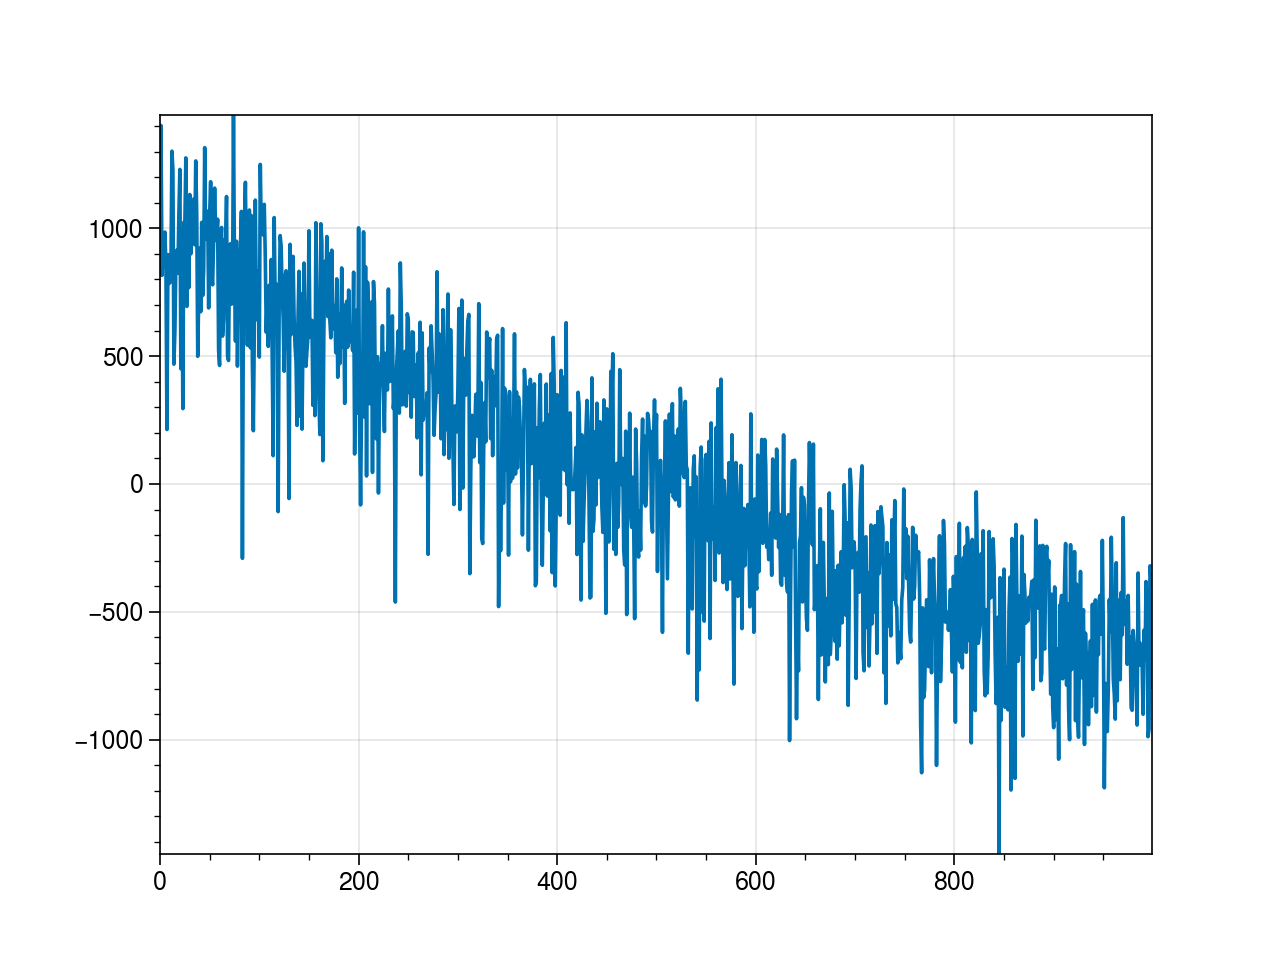

In [15]:
plt.plot(residuals)

#### Can play with other hybrid yields datasets..

0.804031087976912
m 27.790555171045057
b -827.7162088258365


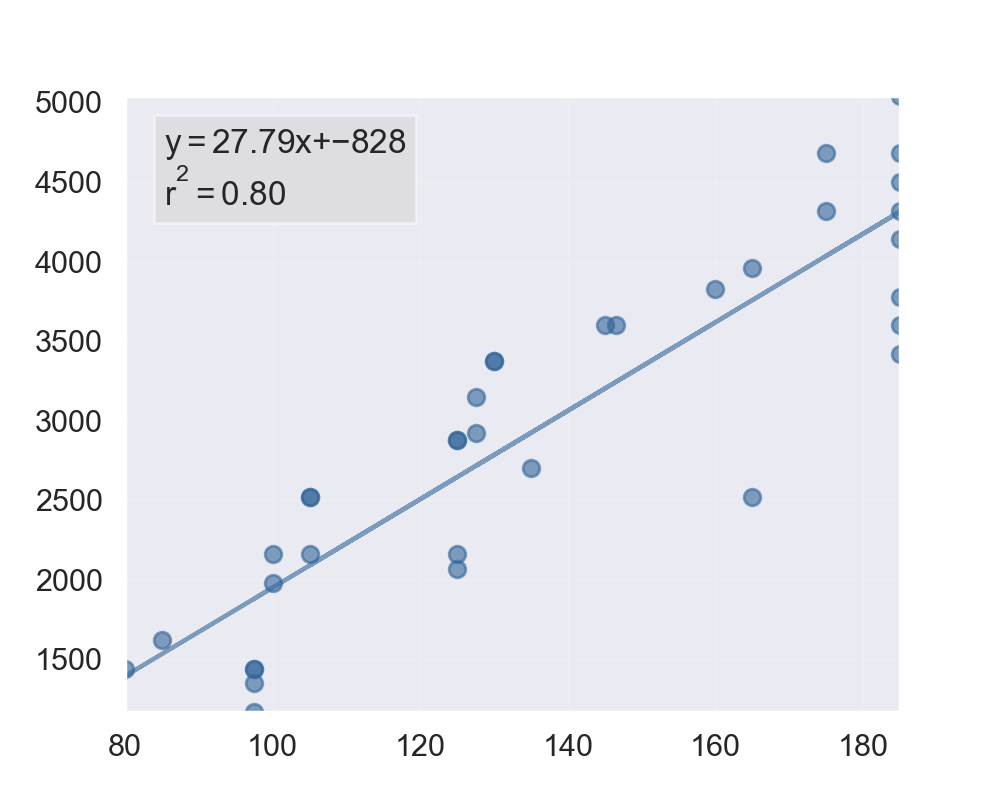

<Figure size 500x400 with 0 Axes>

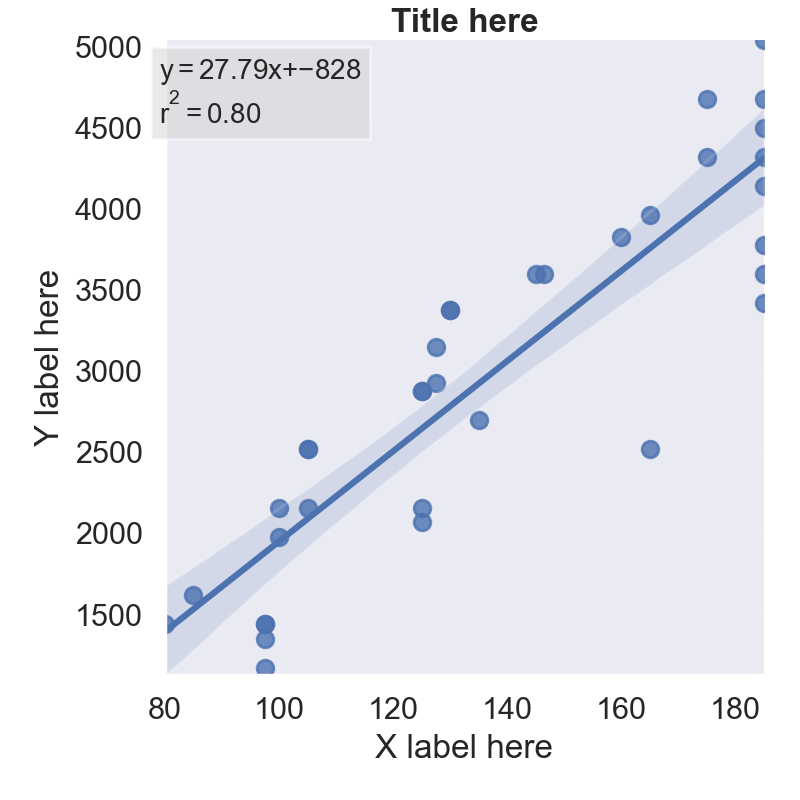

In [90]:
hybrid_data = pd.read_csv('../data/hybrid_yields_v2.csv', usecols = ['VARIETY','Yield_kg','DTM_Avg']).dropna()

hybrid_data
plot_lin_regression(hybrid_data.DTM_Avg, hybrid_data.Yield_kg, 'DTM_Avg','Yield_kg', hybrid_data)


Some thoughts on how to make these plots prettier:
- Black dots, gray error bars, blue line; [example](https://www.google.com/imgres?imgurl=https%3A%2F%2Fi.stack.imgur.com%2FNhMqj.jpg&imgrefurl=https%3A%2F%2Fstats.stackexchange.com%2Fquestions%2F85560%2Fshape-of-confidence-interval-for-predicted-values-in-linear-regression&tbnid=acETO_fACZOFqM&vet=12ahUKEwjSqOOLhY7pAhXnJjQIHSRSBLQQMygDegUIARDxAQ..i&docid=KblJqW3FklqejM&w=1668&h=993&q=confidence%20intervals%20linear%20regression%20python&ved=2ahUKEwjSqOOLhY7pAhXnJjQIHSRSBLQQMygDegUIARDxAQ).
- Nice example of docstrings for functions; [example](https://gist.github.com/rsnemmen/f2c03beb391db809c90f) or a shorter one [example](https://gist.github.com/rsnemmen/0eb32832c657c19e4d39).
- How to get different kinds of curves, but in R; [example](https://stats.idre.ucla.edu/r/faq/how-can-i-explore-different-smooths-in-ggplot2/)
- Maybe worth knowing the difference between lmplot and regplot in seaborn; [example](https://stackoverflow.com/questions/35948995/seaborn-lmplot-got-an-unexpected-keyword-argument-figsize)

#### This is no long necessry: Exponential curves

In [ ]:
x,y = df.TotalRF.values, df.Yield.values

def func(x, a, b, c):
    '''Exponential 3-param function.'''
    return a * np.exp(b * x) + c

# Find best fit.
popt, pcov = curve_fit(func, x, y)
#print popt

# Plot data and best fit curve.
plot(x, y, 'o')
x_ = linspace(230, 876, 1000)
#plot(x_, func(x_, *popt), c='r')
#show()
#pd.DataFrame(func(x_, *popt))
df

# other code for fitting exponential
# from Kenya-pod-sms

# new stuff

# define x and y
x_dat,y_dat = df['TotalRF'], df['AvgStress']

# define the exponential function and parameters of curve_fit
func = lambda x,alpha: np.exp(alpha*x)
# Parameters:
    # f = function 
    # xdata = independent data 
    # ydata = dependent data  
    # p0 = initiatial guess for parameters (None, scalar, or N-length sequence); start with None
    # sigma = uncertainty in ydata -- should read more into this 
# Returns:
    # popt = array of optimal values for parameters so that sum of squared residuals is minimized
    # pcov = 2d array of estimated covariance of popt
    
popt, pcov = curve_fit(f=func, xdata=x_dat, ydata=y_dat) 


print(popt) # parameters
print(pcov) # covariance


# plot the exponential decay curve with data points
ax = plot(x_dat, y_dat, 'ko', label="$ \\beta = ${}".format(popt[0])) # plot scatter plot points
plt.legend(fancybox=True, loc='best',markerscale=0)

xx = np.linspace(0, x_dat, 101) # define linear space for curve
plot(xx, func(xx, *popt), color="b")

plt.xlabel('Distance / km')
plt.ylabel('Correlation coefficient $\\rho$')
plt.title('Daily rainfall as a function of distance')

# old stuff
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x,y = df.TotalRF, df.Yield

popt, pcov = curve_fit(func, x, y) # fit the curve

#print("a = %s , b = %s, c = %s, d = %s"(popt[0], popt[1], popt[2], popt[3])

"""
Use sympy to generate the latex sintax of the function
"""
#xs = sym.Symbol('\lambda')    
#tex = sym.latex(plot_exp_fit(xs,*popt)).replace('$', '')
#plt.title(r'$f(\lambda)= %s$' %(tex),fontsize=16)

"""
Print the coefficients and plot the funcion.
"""

plot(x, y, 'ko', label="Original Noised Data")
plot(x, func(x, *popt), 'r-', label="Fitted Curve")


#plt.plot(x, popt[0]*x**3 + popt[1]*x**2 + popt[2]*x + popt[3], label="Fitted Curve") 

plt.legend(loc='upper left')
plt.show()    

df
t = df['TotalRF'].values
hr = df['Yield']
c, cov = curve_fit(bpm, t, hr)
print(c)

plot(x,y, 'ko')

for i in range(n):
    y_[i] = bpm(x[i],c[0],c[1],c[2],c[3])
    

plot(x,y_, 'r.')

#r2 value of the fit

from sklearn.metrics import r2_score
r2_score(y,hr)